<ipython-input-1-48a9da87cb28>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['Lag_1'] = ts['Close'].shift(1)  # Lag of 1 day
<ipython-input-1-48a9da87cb28>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts.dropna(inplace=True)  # Remove NaN values from shifting


Mean Absolute Error (MAE): 4.2930
Mean Squared Error (MSE): 30.6977
R-squared (R²): 0.5916


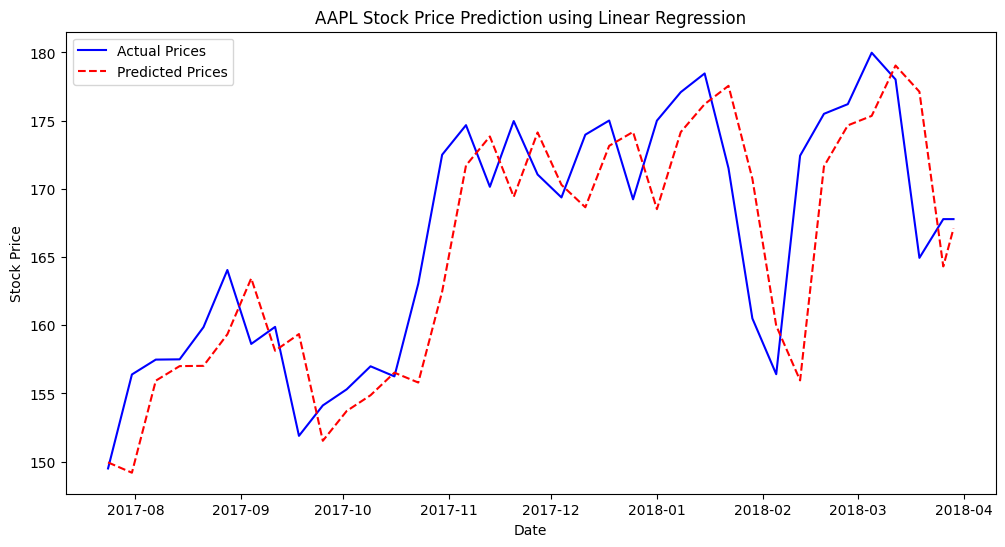

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = '/content/AAPL.csv'  # Replace with your dataset path
data = pd.read_csv(file_path)

# Convert 'Date' to datetime and set it as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Selecting 'Close' price for forecasting
ts = data[['Close']]

# Create lag features for time series forecasting
ts['Lag_1'] = ts['Close'].shift(1)  # Lag of 1 day
ts.dropna(inplace=True)  # Remove NaN values from shifting

# Splitting into training and testing sets
train_size = int(len(ts) * 0.8)  # 80% training, 20% testing
train, test = ts[:train_size], ts[train_size:]

# Prepare X (features) and y (target)
X_train, y_train = train[['Lag_1']], train['Close']
X_test, y_test = test[['Lag_1']], test['Close']

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label="Actual Prices", color='blue')
plt.plot(test.index, y_pred, label="Predicted Prices", color='red', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("AAPL Stock Price Prediction using Linear Regression")
plt.legend()
plt.show()
